# Copenhagen Airbnb Market Analysis
## Data Visualization Final Project
## By Nicolas Obregon



## Introduction and Research Topic

For this project, I will be using the skills I have learnt at class to analyze a market that has been emerging in Europe in the last decade, **Airbnb**.

As Airbnb is a vast company which operates in thousands of cities, I will focus my investigation in **Copenhagen, Denmark**, a major tourist destination in Europe.

I am particularly interested in Copenhagen as it's a city which has had it's tourist economy boom over the last few years. In 2016 alone, close to **17** billion euros were made in Copenhagen from tourism, and of these. When calculated in terms of people, there were around **53.9 million overnight stays** in 2018, only including hotels and other commercial accomodation  [1].

Airbnb is prefered by a lot of people over hotels as they offer a more homely and rural experience than an informal one [3]. Saying this, the company has caused **rents to increase greatly for locals** all around the world as house owners realize that **short term rentals can be more profitable than long term** [2]. Therefore, some parts of the media, public and government have developed negative sentiments against Airbnb and some are trying to regulate the market and implement restrictive laws [4] which have not yet come to fruition.

### Research Question
In **conclusion**, Airbnb's market is a highly volatile one, with a lot of good things happening for it but also facing a lot of adversion from local people and governments. The **main focus and research question** of this project is:
* **Do Airbnb listing factors affect prices?** 

## Data collection / Survey design

The data was collected from **Inside Airbnb** (*http://insideairbnb.com/get-the-data.html*), a webpage that gathers public data from Airbnb and cleans it, making it available to the public. The data is relatively clean (as will be explored below) and from a reliable source.

### Motivation.
My main motivation for this project comes from me having lived in Copenhagen for three years, where I would occasionally rent out my room in Airbnb. I am curious to see what the general market is like, if I overcharged/undercharged and if my apartments was better or worse than other people. To avoid bias, I will not directly compare my apartments data with anything else, even though I know the ID number. 

The data is in csv format, with multiple different variables, of differing data types. It has close to 10000 rows of data, so I will plety of housing options to explore and analyse.

Airbnb data is especially interesing for me as it has latitude and longitude variables which I find particularly intersting and which I can use seaborn for, a library I'd like to get more experience in.

This is also a dataset of which I could not find a single research question done about or data explorative analysis, so it is ideal for this type of project.

## Data overview, cleaning and pre-processing

I will start opening the file, adding extra na_values so when I see how many missing values there are, I miss none.

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot as plotoffline


df = pd.read_csv('listingsCph.csv', header = 0, 
                 na_values = ['n/a', ' ', '', '-'])
      
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.68641,12.54741,Private room,380,2,168,2019-07-19,1.12,1,0,0,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.69196,12.57637,Entire home/apt,2400,4,55,2021-12-06,0.56,1,359,5,NaN
2,31094,"Very central and cozy, new kitchen",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.66539,12.55639,Entire home/apt,750,2,17,2017-08-25,0.12,1,0,0,NaN
3,32379,120 m2 artist flat on Vesterbro,140105,Lise,NaN,Vesterbro-Kongens Enghave,55.67297,12.55327,Entire home/apt,1153,3,76,2021-10-18,0.55,2,92,3,NaN
4,32841,Cozy flat for Adults/Quiet for kids,142143,Anders & Maria,NaN,sterbro,55.71176,12.57091,Entire home/apt,617,100,7,2016-09-15,0.05,1,204,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9726 entries, 0 to 9725
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9726 non-null   int64  
 1   name                            9724 non-null   object 
 2   host_id                         9726 non-null   int64  
 3   host_name                       9722 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9726 non-null   object 
 6   latitude                        9726 non-null   float64
 7   longitude                       9726 non-null   float64
 8   room_type                       9726 non-null   object 
 9   price                           9726 non-null   int64  
 10  minimum_nights                  9726 non-null   int64  
 11  number_of_reviews               9726 non-null   int64  
 12  last_review                     84

### Data Type Cleaning

As seen with the info() method, some data types are 'object', I will change this below.

In [ ]:
df = df.astype({'name': 'category', 
                        'host_name': 'category',
                        'neighbourhood': 'category',
                        'room_type': 'category',
               })

print(df.dtypes)

id                                   int64
name                              category
host_id                              int64
host_name                         category
neighbourhood_group                float64
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
number_of_reviews_ltm                int64
license                            float64
dtype: object


In [ ]:
na_values = df.isna().sum()

na_values

id                                   0
name                                 2
host_id                              0
host_name                            4
neighbourhood_group               9726
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1286
reviews_per_month                 1286
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           9726
dtype: int64

### Missing Values

As seen above, the variables **last_review** and **reviews_per_month** have some missing values. This is due to some apartments are listed on the Airbnb app but have not yet been rented out so I will leave them.
* The public Airbnb information we are using includes listings of the next 365 days after being downloaded, therefore it makes sense

The variables **license** and **neighbourhood_group** miss all values, but this can be left as is as they provides no insightful analysis for my research question. 

In [ ]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,9.726000e+03,9.726000e+03,0.0,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,8440.000000,9726.000000,9726.000000,9726.000000,0.0
mean,2.850072e+07,8.785526e+07,NaN,55.679487,12.559617,1124.829426,4.769175,20.358935,0.678301,5.928645,98.243574,3.176948,NaN
std,1.701261e+07,1.074500e+08,NaN,0.019269,0.031668,2250.963556,21.217892,37.373840,0.887081,26.128987,126.753095,6.974094,NaN
min,6.983000e+03,1.171800e+04,NaN,55.616050,12.454270,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.359948e+07,1.087576e+07,NaN,55.666213,12.542708,632.000000,2.000000,2.000000,0.190000,1.000000,0.000000,0.000000,NaN
50%,2.918333e+07,3.800497e+07,NaN,55.680110,12.557225,875.000000,3.000000,8.000000,0.390000,1.000000,28.000000,1.000000,NaN
75%,4.388693e+07,1.350787e+08,NaN,55.693905,12.581255,1200.000000,4.000000,23.000000,0.810000,1.000000,174.000000,4.000000,NaN
max,5.400027e+07,4.369354e+08,NaN,55.732470,12.639720,100000.000000,1111.000000,676.000000,16.880000,184.000000,365.000000,235.000000,NaN


Now I describe the categorical values which have to be done separately. The information for 'name' and 'host_name' provides no insight so they can be ignored. 

**'neighbourhood' and 'room_type'** are the important ones, and we can see that there are **11 neighbourhoods total and 4 different room types**.

In [ ]:
categorical_info = df[['name','host_name', 'neighbourhood',
                        'room_type']].describe()

categorical_info

,name,host_name,neighbourhood,room_type
count,9724,9722,9726,9726
unique,9442,2874,11,4
top,Cozy apartment in the heart of Copenhagen,ApartmentinCopenhagen,Indre By,Entire home/apt
freq,20,184,1656,8343


### Irregularities
There are some irregularities in the code as can be seen:
* All columns have the same count except for **reviews_per_month**, this was talked about above
* The **price** variable varies a lot, it possibly has outliers, the minimum  is also 0 which is impossible.
  * The max is 100000 which is more than 1.5 times higher than  the 3rd quartile (1200), therefore **it is an outlier**
  * The min is 0 which is also more than 1.5 times lower than the 1st quartile (632), therefore **it is also an outlier**
  * the Boxplot below also shows us an example of the outliers
* The **minimum_nights** variable has a max of 1111 which could be wrong unless plans on renting out an apartment for 3 years have been made.
* I will ignore the **calculated_host_listings_count** as I do not think its content will help me with my research question. Also, from 0%-75% of its quartile range, it is always a 1, meaning most people just have one listing, the max value I believe is an outlier. Good reason to ignore this value 

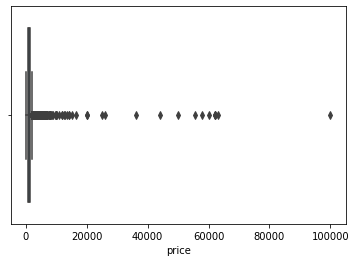

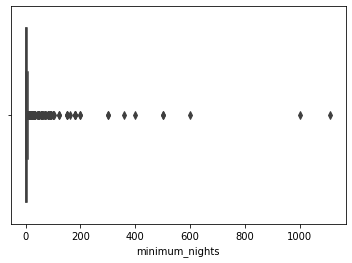

In [ ]:
# We can make a boxplot with the price variable and see that there are quite a lot of outliers, and the same with the minimum_nights variable

plot1 = plt.figure(1)
bp_price = sns.boxplot( x=df['price'] )

plot2 = plt.figure(2)
bp_min_nights = sns.boxplot( x=df['minimum_nights'] )

plt.show()



### Dealing with Outliers
 
These outliers will severely affect visualizations, so I will replace them with the value of the median. I will do this basing myself from StackOverflow code where I grab the standard deviation of the variables, compare it to the absolute median, and if they are larger, they are replaced [5].



In [ ]:
median = df['price'].median()
std = df['price'].std()
outliers = (df['price'] - median).abs() > std
df[outliers] = np.nan
df['price'].fillna(median, inplace=True)

median = df['minimum_nights'].median()
std = df['minimum_nights'].std()
outliers = (df['minimum_nights'] - median).abs() > std
df[outliers] = np.nan
df['minimum_nights'].fillna(median, inplace=True)

price_average = df["price"].mean()
df['price'].replace({0: price_average/.75}, inplace=True)

<Figure size 432x288 with 0 Axes>

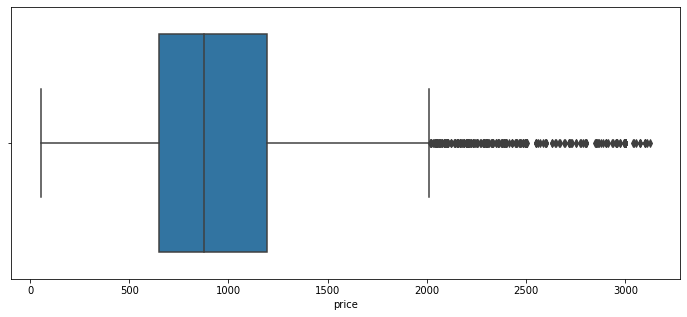

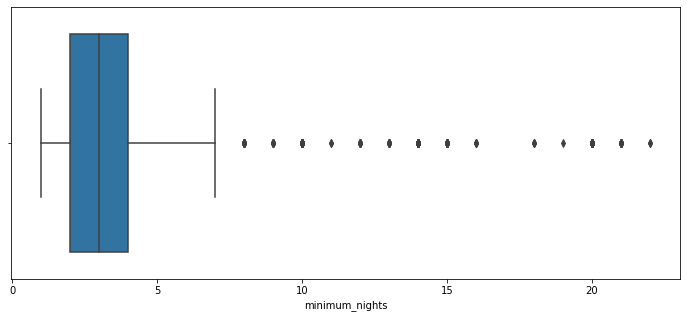

In [ ]:
plot1 = plt.figure(1)
plt.figure(figsize=(12,5))
bp_price = sns.boxplot( x=df['price'] )

plot2 = plt.figure(2)
plt.figure(figsize=(12,5))
bp_min_nights = sns.boxplot( x=df['minimum_nights'] )

plt.show()

### Outliers fixed

Pre-processing and cleaning is done, I can start the analysis now.

## Analysis and Results
### Variables
There are 17 variables, I will divide them in two lists:
* Variables that are important to know to keep track of what is going on, but otherwise have no effect on the analysis:
  * **id**: Self-explanatory
  * **name**: Name of the apartment
  * **host_id**: Self-explanatory
  * **host_name**: First name of the host 
  * **license**: All values are 0, this variable will be ignored.
  * **calculated_host_listings_count**: Amount of listings the host has
  * **last_review**: Date of last review
  * **number_of_reviews_ltm**: Number of reviews in the last 12 months


* Significant variables that will help with the analysis:
  * **neighbourhood**: Area in Copenhagen where the apartment is located, 11 total
  * **latitude**: Approximate latitude of the apartment 
  * **longitude**: Approximate longitude 
  * **room_type**: Room type available
  * **price**: Nightly price
  * **minimum_nights**: Minimum amount of nights apartment can be rented for
  * **reviews_per_month**: Average reviews per month
  * **availability_365**: Days of the year when the apartment is available for
  * **number_of_reviews**: Total number of reviews


### Descriptive Statistics

Now I will do some descriptive statistics. I will start using the **corr()** method with the '**pearson**'. The pearson method indicates a correlation between two variables with a number from -1 to 1.
* -1 means negative correlation
* 0 means no correlation
* 1 means a total positive correlation 

[6].

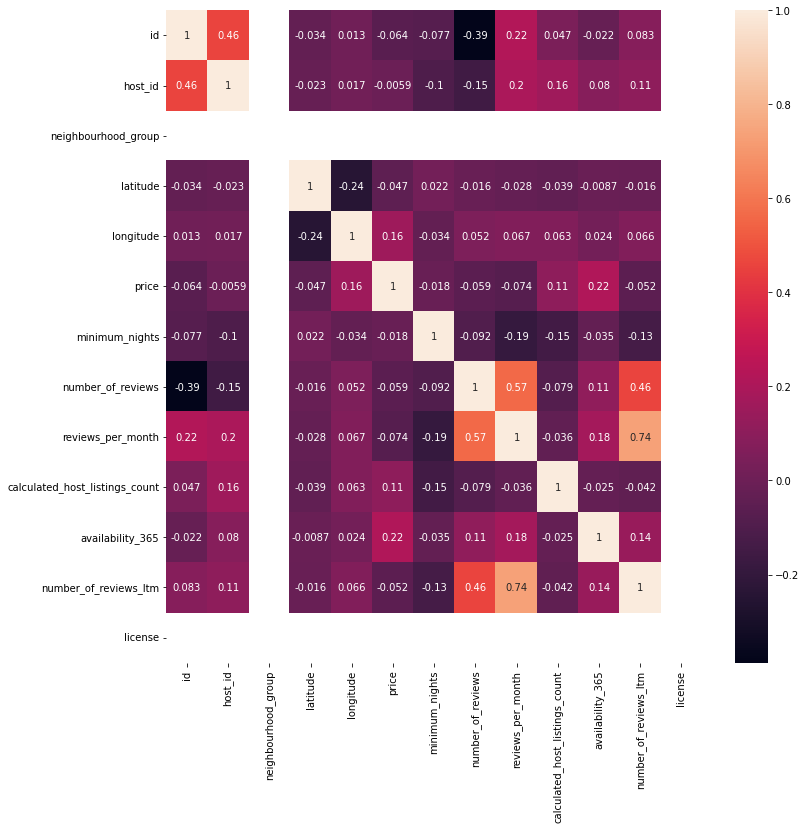

In [ ]:
df = pd.DataFrame(df)

plt.figure(figsize=(12,12))


corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

As can be seen, there are **no strong correlations**. The only variables that have correlations higher than 0.3 are all review variables. Therefore, I know that correlations are low and I can continue analyzing the data without having this affect the results. 

After, I will see how many neighbourhoods they are and see what their names are so I can see if there are differences in price depending on what neighbourhood the apartment is located in

In [ ]:
df["neighbourhood"].replace({"Brnshj-Husum": "Bronshoj-Husum",
                             "Vanlse": "Vanlose", 
                             "Amager st": "Amager Ost",
                             "sterbro": "Osterbro",
                             "Nrrebro": "Norrebro"},
                             inplace=True
                            )

In [ ]:
#Find the frequency of each neightbourhhod value
neighborhood_var = pd.DataFrame(df["neighbourhood"].value_counts())
# Calcualte mean of the price of each neighborhood
neighborhood_price = df.groupby("neighbourhood").mean()["price"]
neighborhood_price = pd.DataFrame(neighborhood_price)
# Add previous two stats, display three columns, neighbourhood, count properties and average price
neighborhood_all = pd.merge(neighborhood_var, 
                              neighborhood_price, 
                              how="inner", left_index=True, right_index=True)
neighborhood_all.reset_index(inplace=True)
neighborhood_all.columns = ["neighbourhood", "count_properties", "avg_price"]
neighborhood_all = neighborhood_all.sort_values(by="avg_price", ascending=False)
neighborhood_all

,neighbourhood,count_properties,avg_price
1,Indre By,1516,1263.939574
4,Frederiksberg,967,980.980352
5,Amager Vest,900,973.838889
3,Osterbro,972,961.307613
0,Vesterbro-Kongens Enghave,1578,951.024840
6,Amager Ost,708,888.570621
2,Norrebro,1490,859.059732
7,Valby,382,804.806283
10,Bronshoj-Husum,183,800.311475
9,Vanlose,244,760.303279


### Context and Neighbourhood Prices and Listing Amounts

We can see a map to understand the context [here](https://drive.google.com/uc?export=view&id=1XjORsj3CB5KwRE0m1ATaAu2jgN6tjCGB), 

Note that some names are missing the Danish 'Ø' because most computers do not operate under the Danish Language. That is why I used the **replace()** method to blocks above, and used O instead of Ø. Otherwise there might be problems if someone else tries to run this code on their computer.

The list is not in order, so I will make a **barplot** using value_counts to see which neighbourhood has the most listings.



Text(0.5, 1.0, 'Total Amount of Listings per Neighbourhood')

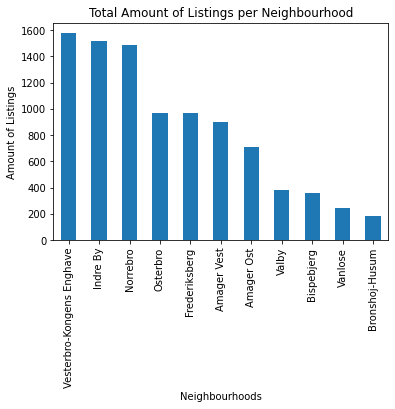

In [ ]:
ax = df['neighbourhood'].value_counts().plot(kind='bar')

ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Amount of Listings')
ax.set_title('Total Amount of Listings per Neighbourhood')


I can project a similar pie chart to contextualize the information differenly, 

Text(0.5, 1.0, 'Percentage of Listings per Neighbourhood')

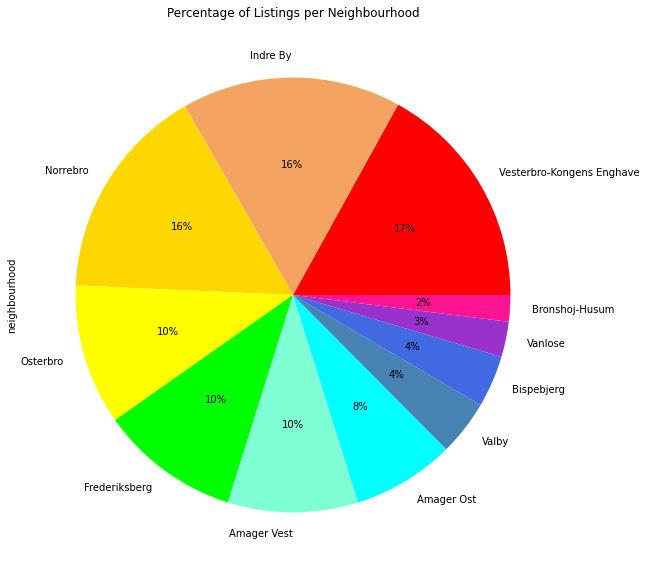

In [ ]:
plt.figure(figsize=(10,10))

df['neighbourhood'].value_counts().plot.pie(autopct= '%1.0f%%',
                                            colors = ['red', 'sandybrown', 'gold', 'yellow', 'lime',
                                                      'aquamarine', 'cyan', 'steelblue', 'royalblue',
                                                      'darkorchid', 'deeppink'])

plt.title('Percentage of Listings per Neighbourhood')

Let's make a **boxplot** seeing the average prices per neighbourhood, I will order these according to the prices that where shown earlier

Text(0.5, 1.0, 'Prices per night per Neighbourhood')

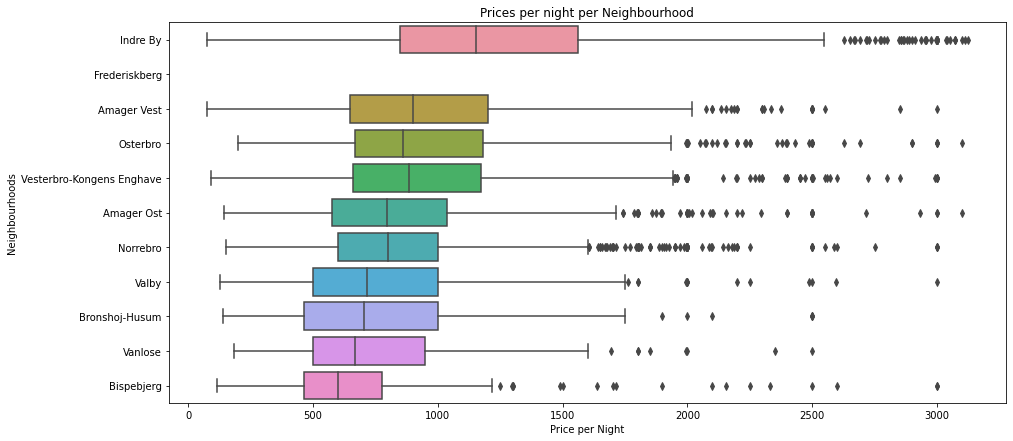

In [ ]:
plt.figure(figsize=(15,7))

ax = sns.boxplot(x = df['price'],
            y = df['neighbourhood'], order = ['Indre By', 'Frederiskberg', 'Amager Vest', 
                                              'Osterbro', 'Vesterbro-Kongens Enghave', 
                                              'Amager Ost', 'Norrebro', 'Valby', 'Bronshoj-Husum',
                                              'Vanlose',	'Bispebjerg'])

ax.set_ylabel('Neighbourhoods')
ax.set_xlabel('Price per Night')
ax.set_title('Prices per night per Neighbourhood')


### Findings

* Vesterbro-Kongens Enghave, Indre By and Norrebro have the most listings, Indre By being the most expensive overall
* Osterbro, Frederiksberg, Amager Ost and Amager Vest go next in listing amounts, and all three share similar prices
* Valby, Bispebjerg, Vanlose and Bronshoj-Husum have the least amount of listings, and are also the cheapest listings

Knowing Copenhagen, I can say that that the closer we go to the center, the more listings there are and the more expensive they are. This makes sense, tourism usually thrives in city centers. 

**I will make another plot later to visualize the locations of the listings to better visualize this point rather than just say it myself.**

### Room Type Analysis

Before I analyze the location of listings, I want to better understand the room types and see what they affect

In [ ]:
#Find the frequency of each room type value
room_type_var = pd.DataFrame(df["room_type"].value_counts())
# Calcualte mean of the price of each room type
room_type_price = df.groupby("room_type").mean()["price"]
room_type_price = pd.DataFrame(room_type_price)
# Add previous two stats, display three columns, room type, count properties and average price

room_type_all = pd.merge(room_type_var, 
                              room_type_price, 
                              how="inner", left_index=True, right_index=True)
room_type_all.reset_index(inplace=True)
room_type_all.columns = ["room_type", "count_properties", "avg_price"]
room_type_all = room_type_all.sort_values(by="room_type", ascending=False)
room_type_all

,room_type,count_properties,avg_price
3,Shared room,19,613.789474
2,Hotel room,24,879.024592
1,Private room,1265,521.247431
0,Entire home/apt,7990,1035.358949


We can see that most values are entire home/apt or private room, Hotel Room and Shared room only account for not even 1% of the totals, not even 0.01% so I will mostly ignore these (apart from making one graph exclusively of them). We can visualize below how insignificant these 2 values are: 

Text(0.5, 1.0, 'Total Amount of Properties per Neighbourhood')

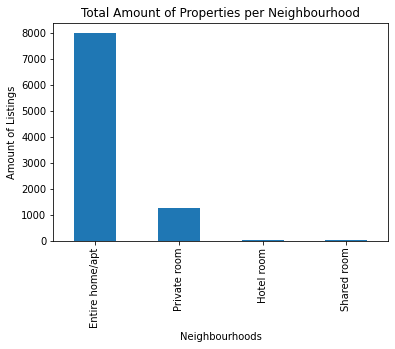

In [ ]:
ax = df['room_type'].value_counts().plot(kind='bar')

ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Amount of Listings')
ax.set_title('Total Amount of Properties per Neighbourhood')

I can make a **catplot** where I use the categories. 

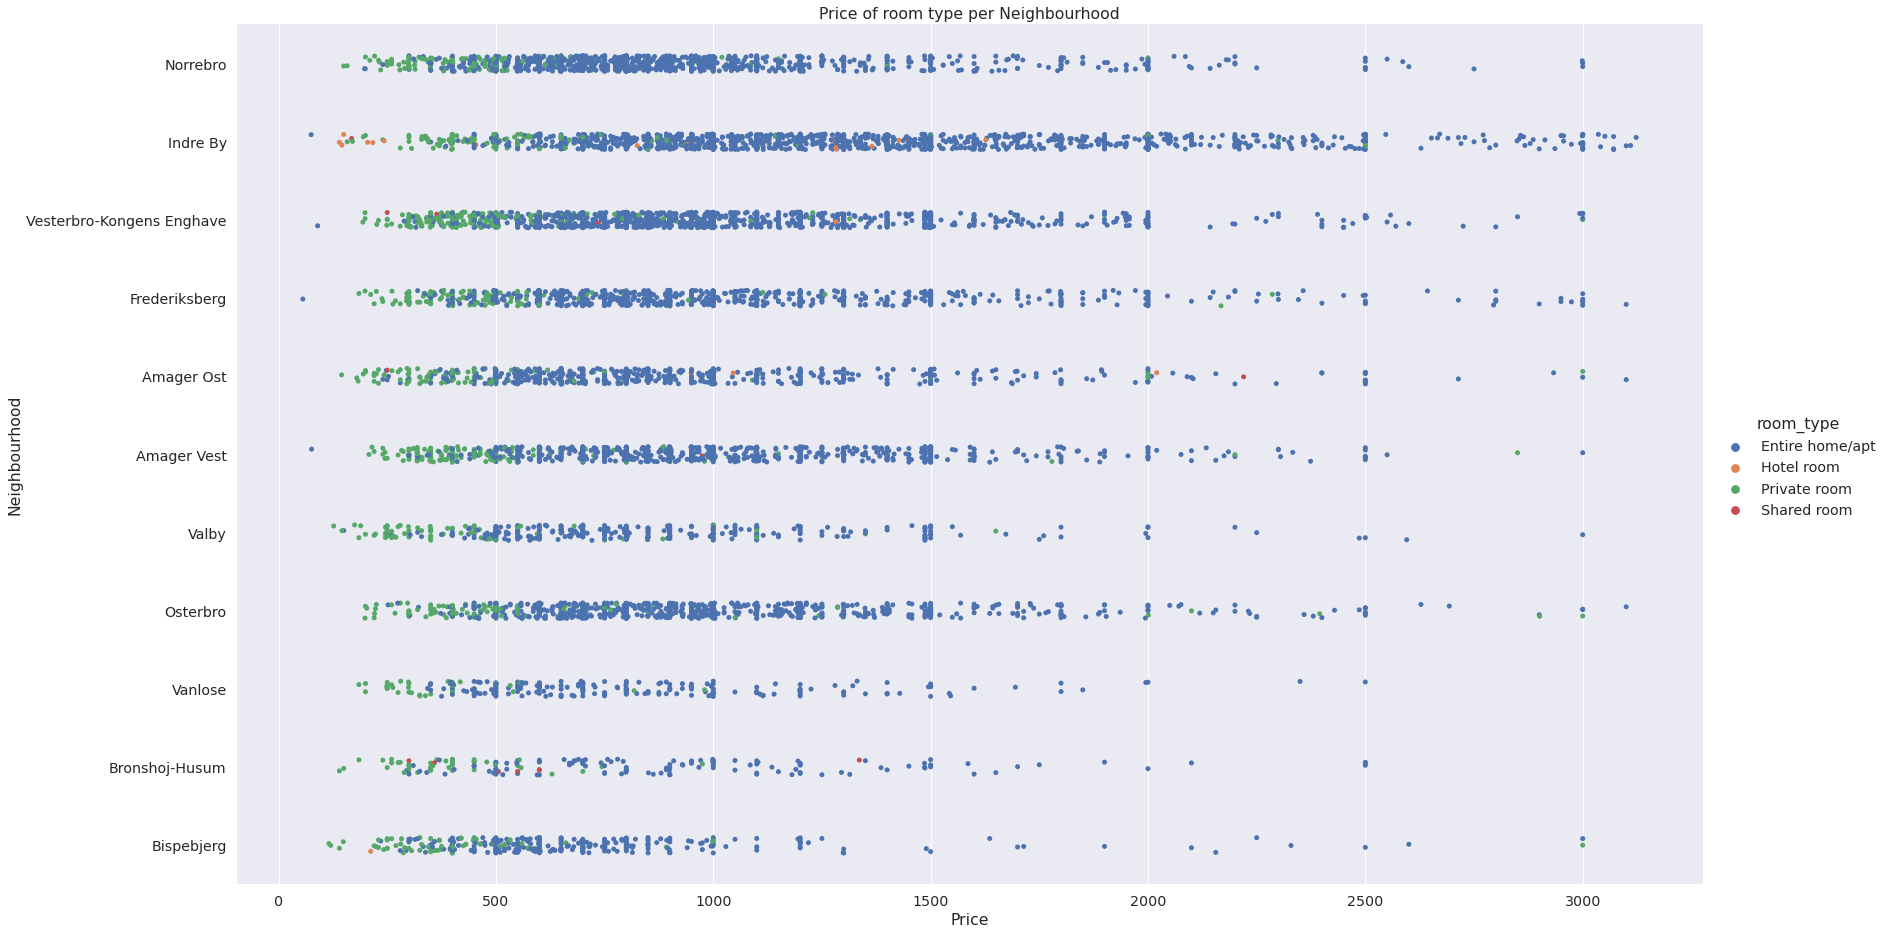

In [ ]:
sns.set(font_scale = 1.3)


#Set the correct data types
df['room_type'] = df['room_type'].astype(pd.CategoricalDtype(
    categories = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'
                  ], ordered = False))
#Jitter values can affect how close the dots are, the higher the value the less conglomerated they are
g = sns.catplot(x = 'price', y = 'neighbourhood', hue = 'room_type', data = df, kind = 'strip', jitter = 1, height = 13, aspect=15/8)
g.ax.set_title('Price of room type per Neighbourhood')
g.ax.set_ylabel('Neighbourhood')
g.ax.set_xlabel('Price')
plt.show()

### Hotel Room and Shared Room Analysis

Since there are so few of these variables (they are equivalent to 0.03% of the data), they will be ignored in most of the analysis but I will make this small section to analyse them. I make a new dataframe taking only into account these 2 room types and not the other 2.

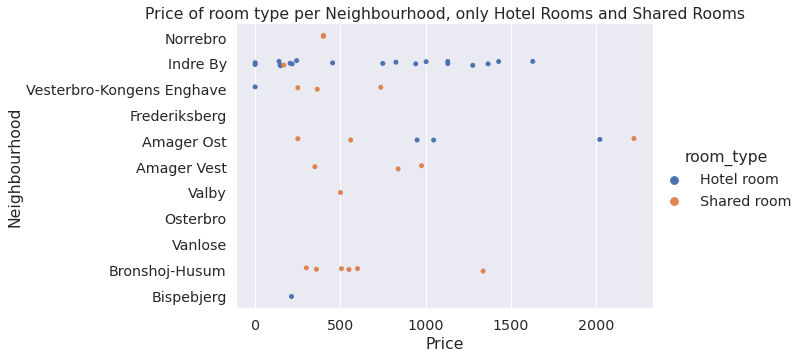

In [ ]:
df_room_excluded = pd.read_csv('listingsCph.csv', header = 0, 
                 na_values = ['n/a', ' ', '', '-'])
 
df_room_excluded = df_room_excluded.astype({'name': 'category', 
                        'host_name': 'category',
                        'neighbourhood': 'category',
                        'room_type': 'category',
               })
 
median = df_room_excluded['price'].median()
std = df_room_excluded['price'].std()
outliers = (df_room_excluded['price'] - median).abs() > std
df_room_excluded[outliers] = np.nan
df_room_excluded['price'].fillna(median, inplace=True)
 
median = df_room_excluded['minimum_nights'].median()
std = df_room_excluded['minimum_nights'].std()
outliers = (df_room_excluded['minimum_nights'] - median).abs() > std
df_room_excluded[outliers] = np.nan
df_room_excluded['minimum_nights'].fillna(median, inplace=True)
 
df_room_excluded["neighbourhood"].replace({"Brnshj-Husum": "Bronshoj-Husum",
                             "Vanlse": "Vanlose", 
                             "Amager st": "Amager Ost",
                             "sterbro": "Osterbro",
                             "Nrrebro": "Norrebro"},
                             inplace=True
                            )
 
#Set the correct data types
df_room_excluded['room_type'] = df_room_excluded['room_type'].astype(pd.CategoricalDtype(
    categories = ['Hotel room', 'Shared room'], ordered = False))

g = sns.catplot(x = 'price', y = 'neighbourhood', hue = 'room_type', data = df_room_excluded, kind = 'strip', height = 5, aspect=8/4)
g.ax.set_title('Price of room type per Neighbourhood, only Hotel Rooms and Shared Rooms')
g.ax.set_ylabel('Neighbourhood')
g.ax.set_xlabel('Price')
plt.show()


### Findings

* Most of the room types are **EntireHomes/Apartments**. 
* The other room types of which there are prevalent values of is **PrivateRooms**
  * The price of these is significantly lower than **EntireHomes/Apartments**.
  
* The HotelRoom values (24), are centralized on Indre By, which is interesting, only 5 are outside
* The SharedRoom values (19) are all over, except in Osterbro and Vanlose.

### Analyzing as a Map

I started using the plotly graphing library to display the Airbnb listings based on latitude and longitude. The map can be zoomed in for reference. As fancy as it may look, it is not a good analyzing tool.

[7].

In [ ]:
import plotly.express as px

fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="id", locationmode = 'ISO-3')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

Therefore, I will make a **scatterplot** to se better the data. I will start with the room type data, which we saw before with a catplot, and now we can visualize better where things are.

In the following case, I can see that most room types are EntireHomes/Apts or PrivateRoom, and HotelRooms are located where Indre By is, which proves what I said before.

Choosing the color palette is difficult as there are so many values and some have significantly more than others. 

Note that the empty spots in the map are usually parks.

[8].

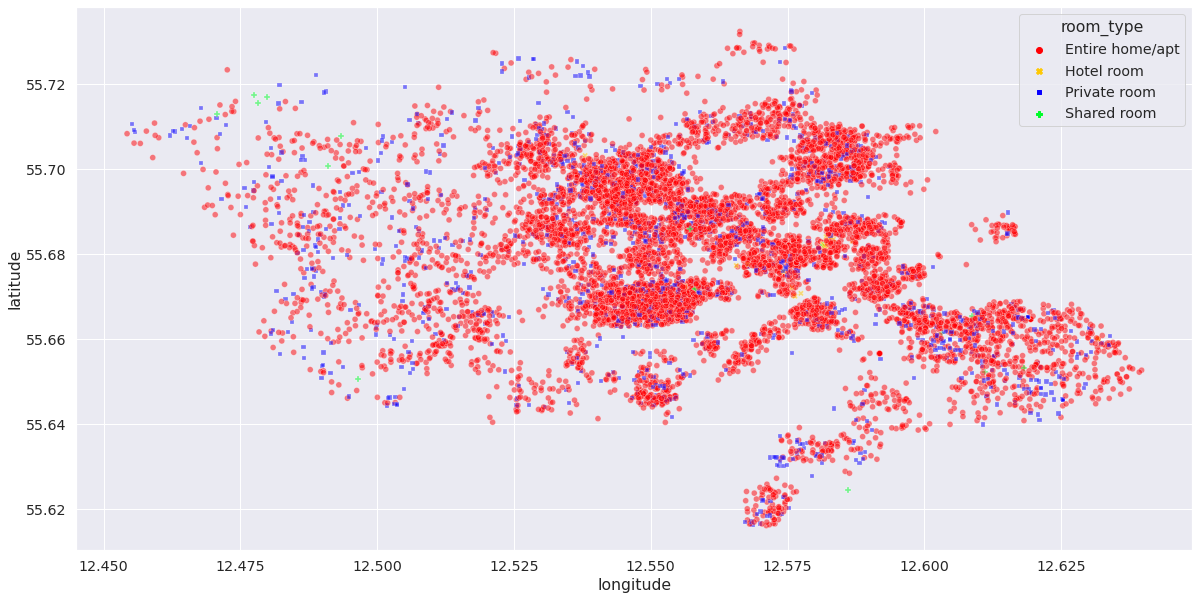

In [ ]:
plt.figure(figsize=(20,10))
#I chose red and blue for the 2 room types that are the most present, as they are easier to differentiate. The Yellos and green values are hard to see but that is because 
# they are 35 values out of 9000+
own_colors = ['#ff0004', '#ffc800', '#0800ff', '#00fc2a']
#Here, x and y are self explanatory, hue acts as a grouper, defining how different dots get different colors (the room types), style gives each different variable a different shape
# which can be hard to see but is more clear in the legend
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue = df['room_type'], style = df['room_type'], palette=sns.set_palette(own_colors), legend = 'full', alpha = 0.5)
plt.show()

Simlarly, I can use cross tabulation and make a grouped bar chart. It shows us again that most rooms are EntireHome/Apartment, followed by a few PrivateRooms and almost no HotelRooms and SharedRooms (some of these cant even be seen as they are in the single digits)

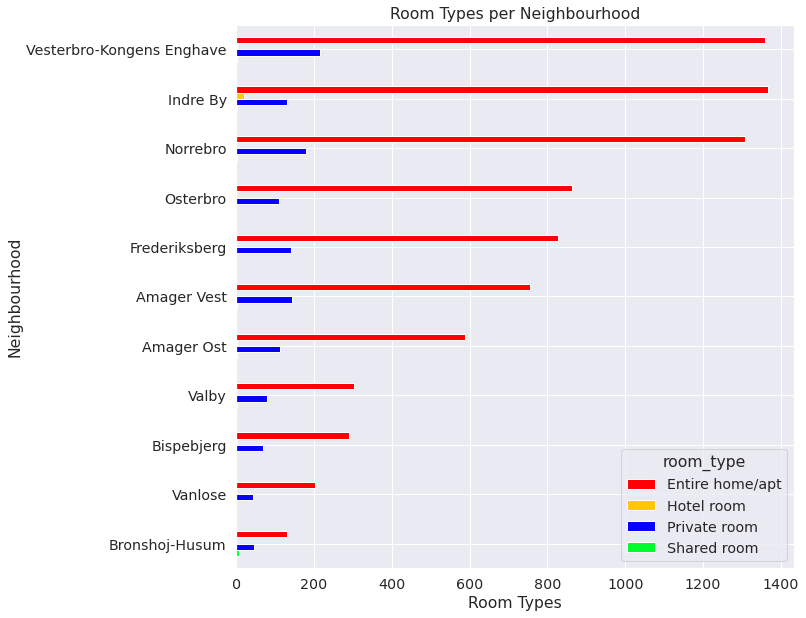

In [ ]:
# Cross tabulate neighbourhood and room types
table = pd.crosstab(df['neighbourhood'], df['room_type'], margins = True)
 
table.drop('All', axis = 'rows', inplace = True)
table = table.sort_values(by = 'All', ascending =False)
table.drop('All', axis = 'columns', inplace = True)
 
ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('Room Types per Neighbourhood')
ax.set_xlabel('Room Types')
ax.set_ylabel('Neighbourhood')
plt.gcf().set_size_inches(10, 10)

plt.show()

I can do another scatterplot to see where the different neighbourhoods are located (**Indre By, the center of the city, is the orange crosses**).

There are more listings centraly, and the farther away we go, the less there are

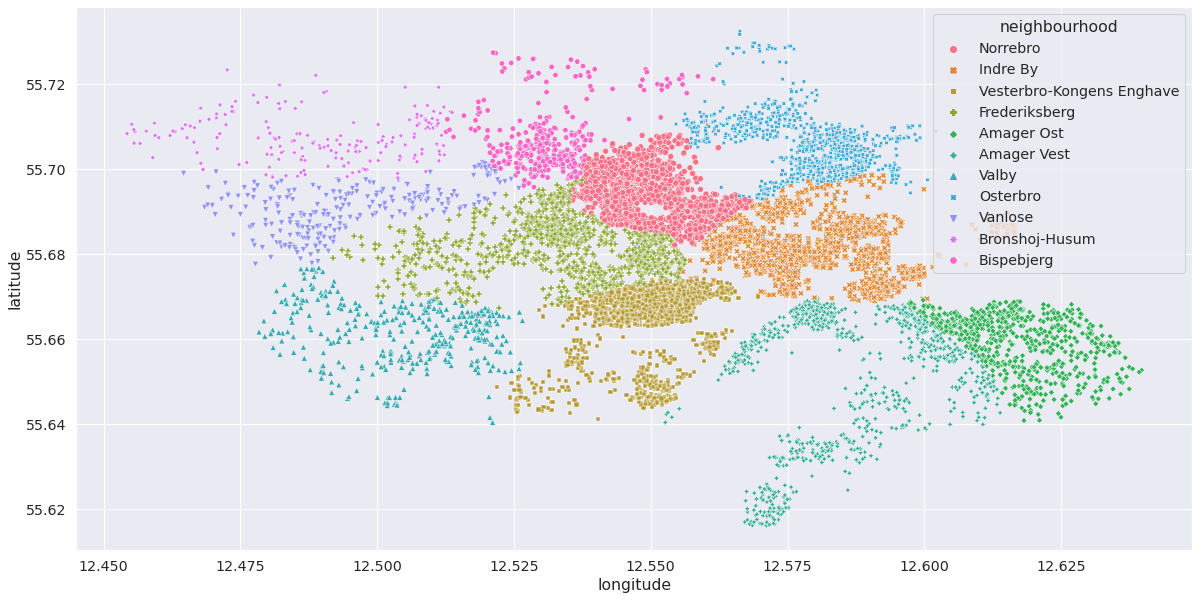

In [ ]:
plt.figure(figsize=(20,10))
own_colors = ['#df29ff', '#fa0202', '#050505', '#00ff2a']
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue = df['neighbourhood'], style = df['neighbourhood'], palette=sns.set_palette(own_colors), legend = 'full')
plt.show()

### Bin and Prices
Below I bin together the prices and add them to the dataframe, so I can display them as the hue in the scatterplot. **This is the best scatterplot to analyze prices and location**. We can clearly see that the closer to the center we get, the higher prices go up. As we centralize, the dots get darker.

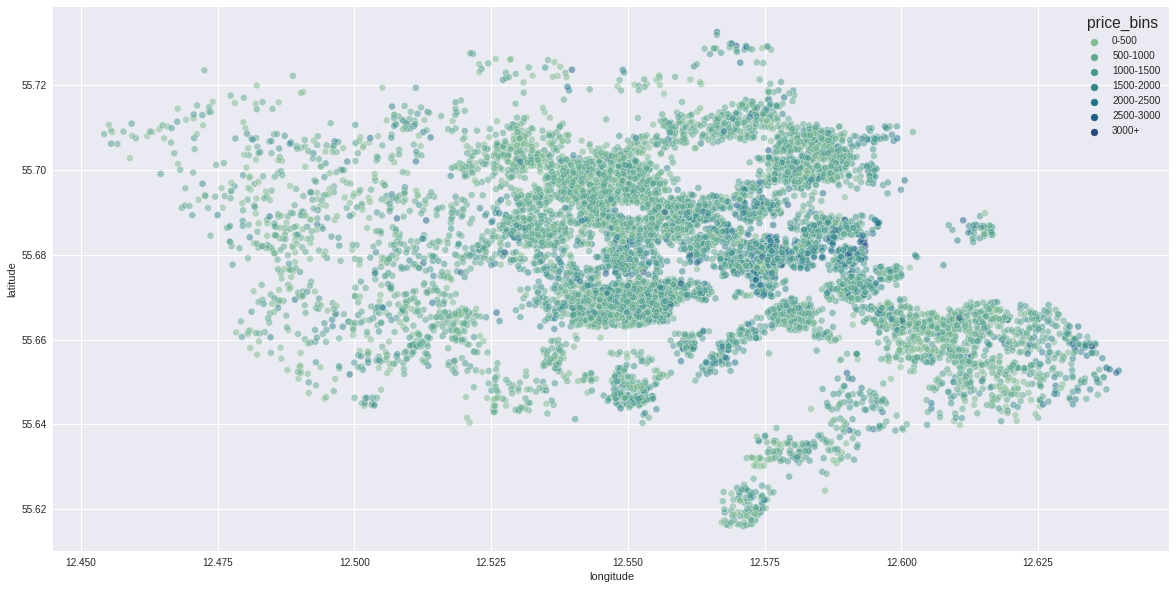

In [ ]:
plt.style.use('seaborn')
#Create prices in bin style
price_bins = pd.cut(df['price'], 
                     bins=[0, 500, 1000, 1500, 2000, 2500, 3000, df['price'].max()], 
                     labels=['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+'])

#Add prices in bin style to the dataframe
df['price_bins'] = price_bins 
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue='price_bins', data=df, palette = 'crest', alpha=0.5, legend = 'full')
plt.show()


### Minimum Nights and Price

With the following **box plot**, I see that **accross all prices, most minimum nights offered are from 1-4**.

Text(0.5, 1.0, 'Prices and amount of Minimum Nights Available')

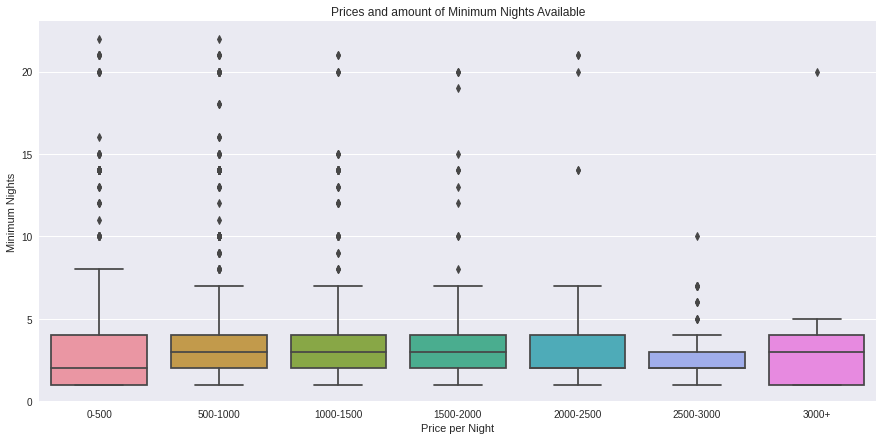

In [ ]:
plt.figure(figsize=(15,7))

ax = sns.boxplot(x = df['price_bins'],
            y = df['minimum_nights'])

ax.set_ylabel('Minimum Nights')
ax.set_xlabel('Price per Night')
ax.set_title('Prices and amount of Minimum Nights Available')


### Reviews per Month and Price

To start, a **barplot** shows how the amount of reviews per month are distributed. 

Text(0.5, 1.0, 'Total Amount of Listings per Neighbourhood')

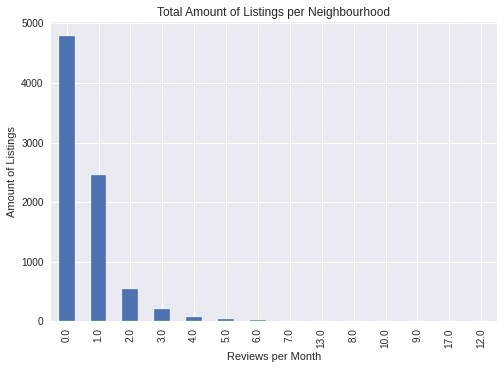

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].round(decimals = 0)

ax = df['reviews_per_month'].value_counts().plot(kind='bar')
 
ax.set_xlabel('Reviews per Month')
ax.set_ylabel('Amount of Listings')
ax.set_title('Total Amount of Listings per Neighbourhood')

We can see that a lot of Listings have never been reviewed, and most of the rest have had only 1 or 2 reviews, few even more. Knowing this, let's compare it to the price now.

This is not so useful, so let's see instead the following:

### Number of Reviews, Price, and Neighbourhood

I will be doing a scatterplot as there are too many values to do a bar plot and I think that doing bins with these values can lead to loss of information.

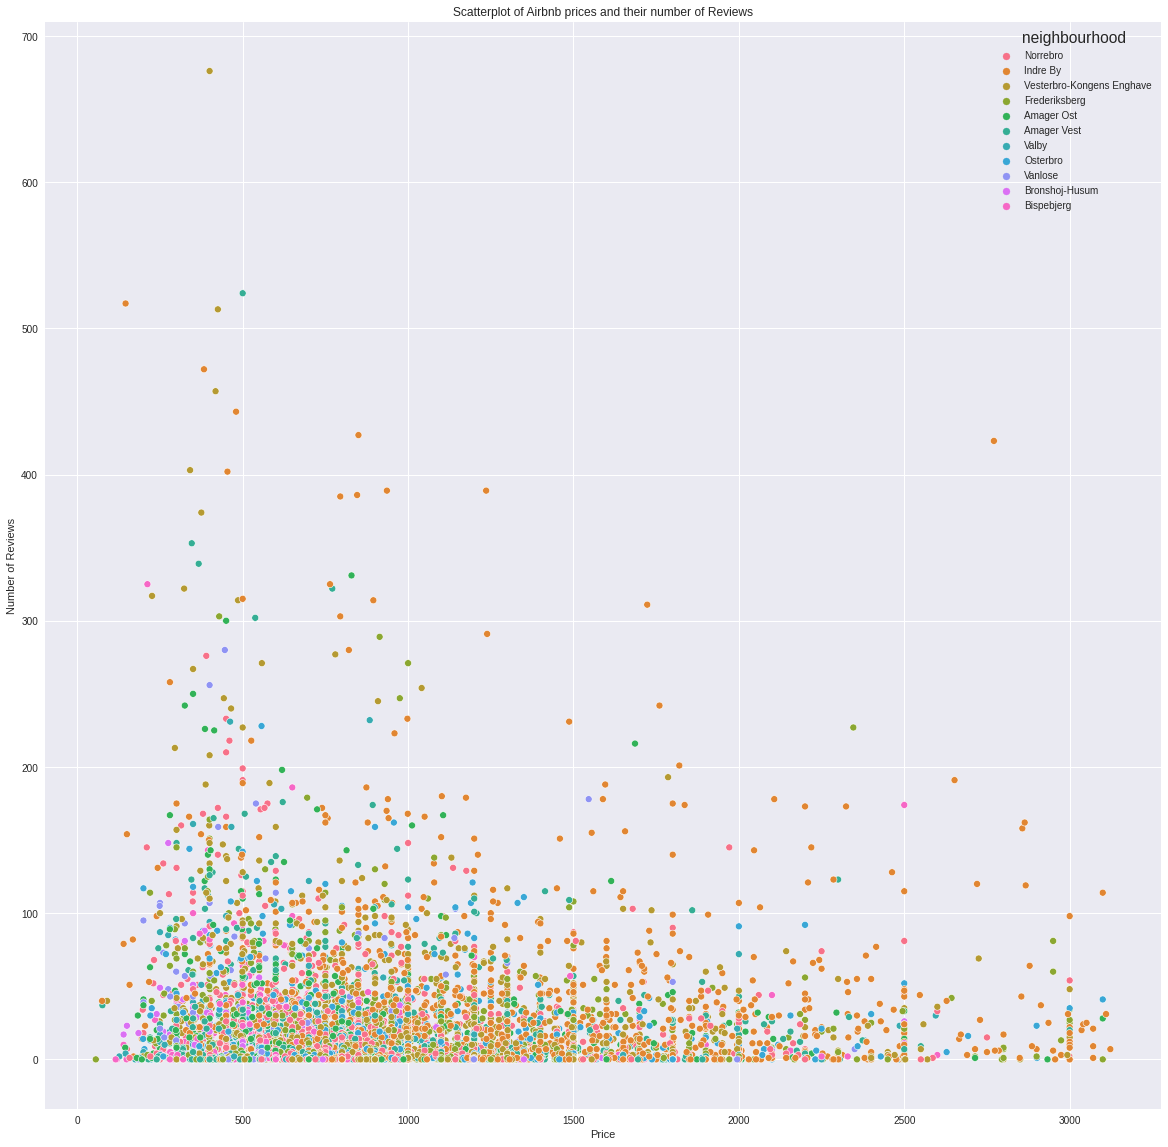

In [ ]:
plt.figure(figsize=(20,20))
sns.scatterplot(x=df['price'], y=df['number_of_reviews'], 
                hue = df['neighbourhood'], 
                legend = 'full')

plt.title('Scatterplot of Airbnb prices and their number of Reviews')
# Set x-axis label
plt.xlabel('Price')
# Set y-axis label
plt.ylabel('Number of Reviews')

plt.show()

Here is a **regression plot** to visualize the information on smaller detail, without the neighbourhoods included

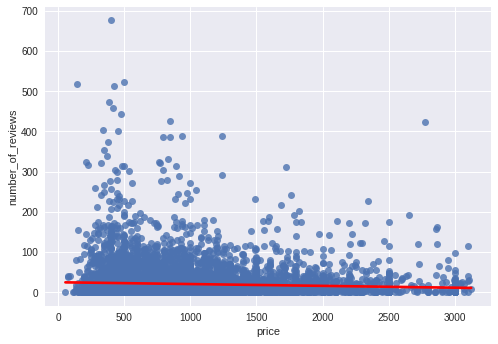

In [ ]:
#The line_kws variable let's us change the color so we can see it
sns.regplot(x = 'price', y = 'number_of_reviews', data = df, line_kws={"color": "red"})

### Findings

It seems the lower the price, the more reviews apartmens have. However, the linear regression line is barely slanted so maybe this is not as true as I would have believed.

### Availabilty 365

Now I will see the last variable, availability_365

Text(0.5, 1.0, 'Total Amount of Listings per Neighbourhood')

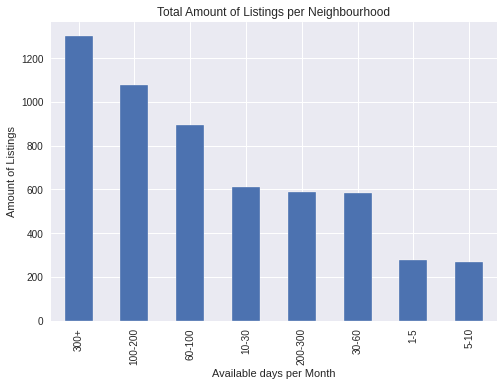

In [ ]:
#Create available days in bin style

days_bins = pd.cut(df['availability_365'], 
                     bins=[1, 5, 10, 30, 60, 100, 200, 300, df['availability_365'].max()], 
                     labels=['1-5', '5-10', '10-30', '30-60', '60-100', '100-200', '200-300', '300+'])

df['days_bins'] = days_bins 

ax = df['days_bins'].value_counts().plot(kind='bar')
 
ax.set_xlabel('Available days per Month')
ax.set_ylabel('Amount of Listings')
ax.set_title('Total Amount of Listings per Neighbourhood')

Again I made bins to round together some values, and surprisingly, most listings are avaialble for 100 days or more.

Text(0.5, 1.0, 'Prices and Reviews per Month')

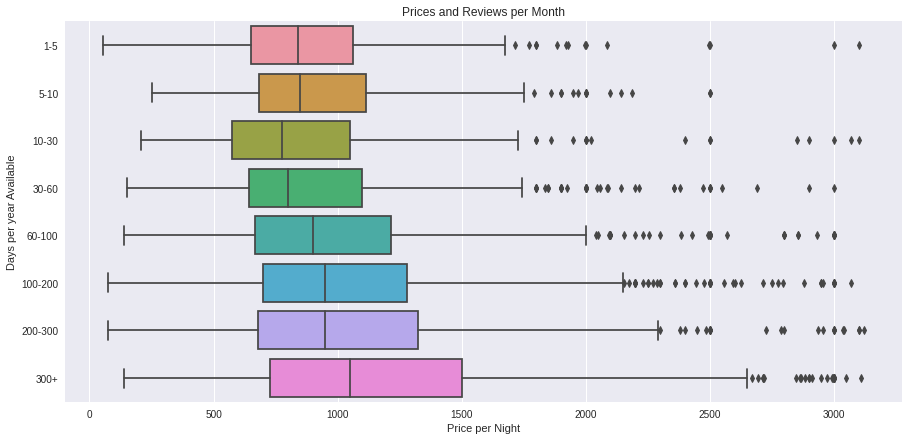

In [ ]:
plt.figure(figsize=(15,7))

ax = sns.boxplot(x = df['price'],
            y = df['days_bins'])

ax.set_ylabel('Days per year Available')
ax.set_xlabel('Price per Night')
ax.set_title('Prices and Reviews per Month')

### Findings

There is a small pattern, as apartments are more available, their price slightly increases slightly. The correlation might not be very strong, but it is there nonetheless

### Scatterplot Matrix

For curiosity, I made a scatterplot matrix. It is hard to read with so many values but we can see some patterns (number_of_reviews + price, number_of_reviews + minimum_nights, number_of_reviews + neighbourhood).

<Figure size 1440x1440 with 0 Axes>

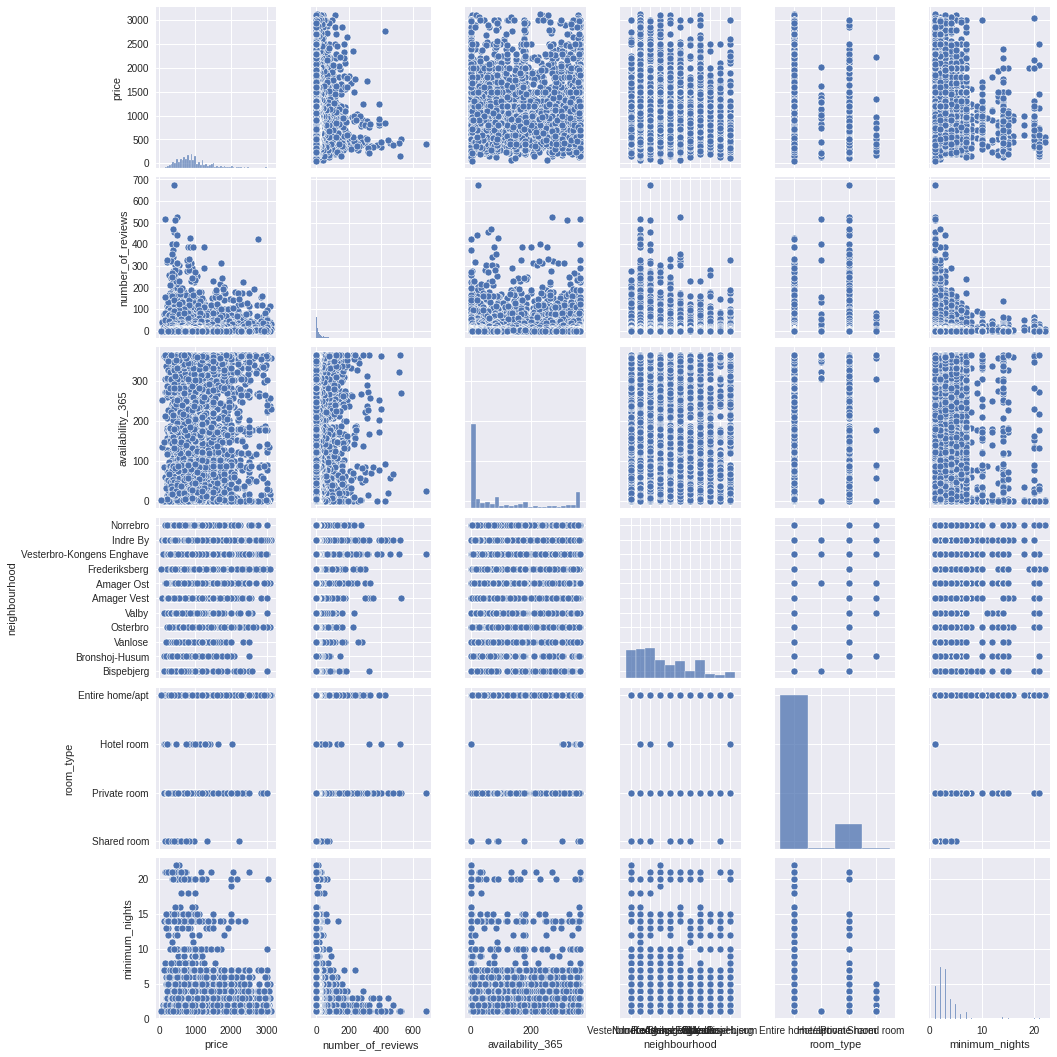

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df, vars=['price', 'number_of_reviews', 'availability_365', 'neighbourhood', 'room_type', 'minimum_nights'])
plt.show()


## Conclusions

### Summary
Airbnb prices are more complicated than first thought, and have no intrinsic or extreme correlation to something else, I have concluded that prices are affected by a multitude of factors. Most important is the location. As mentioned, the more central a listing is, the more expensive it is. This is further supported by most central neighbourhoods having more listings than the outer ones.

Availability_365 slightly altered the price, with more available listings having higher prices than average.

Both minimum_nights and number_of_reviews did not heavily affect the price, though they seemed to be related to one another.

Lastly, room_types were surprisingly simple, most being entire localizations for rent.

The visualizations I used were appropriate for the analysis, and convey well what I am trying to find, and help us understand and analyze the data.


### Variables
This project was **highly descriptive, not inferential**.

**Numerical Variables**:
* *latitude*
* *longitude*
* *price*
* *minimum_nights*
* *number_of_reviews*
* *reviews_per_month*
* *availability_365*
* *number_of_reviews_ltm*

**Categorical Variables**:
* *neighbourhood*
* *room_type*

**No categoricals were ordinal**, the categorical where **all nominal**.
The numericals where **ratio**.


When frequency counts were done, **univariate** analysis was done. The remainder of the analysis was **bivariate** with exception of the scatterplots, which where **trivariate**. 

Significant geospatial analysis was done with scatterplots, latitude and longitude, reflecting the real world, even the empty parks in Copenhagen can be seen in some graphs.

### Self Evaluation
My coding and analysis tools heavily increased during this project. I feel more confident with seaborn and believe I understand the task of analysis better now, including how to present it.

To improve, I would have liked to do a time series if I had proper **time data** available. Also, if I had less values I would have used swarm plots in some cases as its sometimes better. Besides this, I am very happy with my project. 

## References

[1].*Tourism in the economy*, OECD Tourism Statistics (Database), (*https://www.oecd-ilibrary.org/sites/8e2e8e9e-en/index.html?itemId=/content/component/8e2e8e9e-en*), 2018.

[2]. *Airbnb drives up rents in Berlin, new study finds*, The Local, (*https://www.thelocal.de/20210217/airbnb-drives-up-rents-in-german-capital-berin-study-finds/*), 17 February 2021.

[3]. *Airbnb Report on Travel & Living*. Airbnb, May 2021

[4]. *Ekspert: Mange københavnske Airbnb-priser er ulovlige*, TV2, (*https://nyheder.tv2.dk/business/2014-08-07-ekspert-mange-koebenhavnske-airbnbpriser-er-ulovlige*), 7 August 2014.

[5]. Rich Andrews, *How to Replace Outliers with Median in Pandas dataframe?*, StackOverflow (*https://stackoverflow.com/questions/55268364/how-to-replace-outliers-with-median-in-pandas-dataframe*), March 20 2019.

[6]. Nettleton, D. (2014). Selection of Variables and Factor Derivation. In Commercial Data Mining Processing, analysis and modeling for Predictive Analytics Projects. essay, Elsevier.

[7]. *plotly.express.scatter_go*, plotly Graphing Libraries https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html

[8]. *seaborn.color_palette*, seaborn, https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette



Author, Title, Journal, Page

## Word Count

The following code will count the number of words in Markdown cells. Code cells are not included.

- `Main word count` is the number of words in the main body of the text, *excluding* references or appendices.
- `References and appendices word count` is the number of words in any references or appendices.

Only `Main word count` relates to the assignment word limit. There is no limit to the number of words that can be included in references or appendices. Please note that appendices should only be used to provide context or supporting information. *No marks will be directly awarded for material submitted in appendices*.

Important:

- Please do not modify the word count code!
- To exclude references from your word count **you must** have a cell that starts with the text `## References`. Everything below this cell will not count towards the main word count.
- If you are submitting additional material as appendices **you must** have a cell that starts with the text `## Appendices`. Everything below this cell will not count towards the main word count. If you do not have any appendices you can delete the `## Appendices` cell.
- Code comments should only be used to explain details of the implementation, not for discussing your findings. All analysis commentary **must** be written in Markdown cells. *No marks will be awarded for analysis discussion submitted as comments in code cells*.

In [ ]:
%%js

// Run this cell to update your word count.

function wordcount() {
    let wordCount = 0
    let extraCount = 0
    let mainBody = true

    let cells = Jupyter.notebook.get_cells()
    cells.forEach((cell) => {
        if (cell.cell_type == 'markdown') {
            let text = cell.get_text()
            // Stop counting as main body when get to References or Appendices.
            if (text.startsWith('## References') ||
                text.startsWith('## Appendices')) {
                mainBody = false
            }
            if (text.startsWith('## Word Count')) {
                text = ''
            }
            if (text) {
                let words = text.toLowerCase().match(/\b[a-z\d]+\b/g)
                if (words) {
                    let cellCount = words.length
                    if (mainBody) {
                        wordCount += cellCount
                    } else {
                        extraCount += cellCount
                    }
                }
            }
        }
    })
    return [wordCount, extraCount]
}

let wc = wordcount()
element.append(`Main word count: ${wc[0]} (References and appendices word count: ${wc[1]})`)

<IPython.core.display.Javascript object>